In [2]:
import pandas as pd

sale = pd.read_csv("beverage_sale.csv")
sale.head()


,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
0,ORD1,CUS1496,B2B,Vio Wasser,Water,1.66,53,0.10,79.18,Baden-Württemberg,2023-08-23
1,ORD1,CUS1496,B2B,Evian,Water,1.56,90,0.10,126.36,Baden-Württemberg,2023-08-23
2,ORD1,CUS1496,B2B,Sprite,Soft Drinks,1.17,73,0.05,81.14,Baden-Württemberg,2023-08-23
3,ORD1,CUS1496,B2B,Rauch Multivitamin,Juices,3.22,59,0.10,170.98,Baden-Württemberg,2023-08-23
4,ORD1,CUS1496,B2B,Gerolsteiner,Water,0.87,35,0.10,27.40,Baden-Württemberg,2023-08-23


In [3]:
sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8999910 entries, 0 to 8999909
Data columns (total 11 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Order_ID       object 
 1   Customer_ID    object 
 2   Customer_Type  object 
 3   Product        object 
 4   Category       object 
 5   Unit_Price     float64
 6   Quantity       int64  
 7   Discount       float64
 8   Total_Price    float64
 9   Region         object 
 10  Order_Date     object 
dtypes: float64(3), int64(1), object(7)
memory usage: 755.3+ MB


In [4]:
sale.describe(include="all")

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
count,8999910,8999910,8999910,8999910,8999910,8.999910e+06,8.999910e+06,8.999910e+06,8.999910e+06,8999910,8999910
unique,3000000,10000,2,47,4,NaN,NaN,NaN,NaN,16,1094
top,ORD1799745,CUS4693,B2C,Hohes C Orange,Alcoholic Beverages,NaN,NaN,NaN,NaN,Hamburg,2023-06-22
freq,5,1120,5795405,337114,2251625,NaN,NaN,NaN,NaN,604054,8749
mean,NaN,NaN,NaN,NaN,NaN,5.818037e+00,2.313813e+01,2.972879e-02,1.307437e+02,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,1.470050e+01,2.689321e+01,4.479841e-02,5.096947e+02,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,3.200000e-01,1.000000e+00,0.000000e+00,3.000000e-01,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,1.050000e+00,6.000000e+00,0.000000e+00,8.400000e+00,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,1.750000e+00,1.100000e+01,0.000000e+00,2.114000e+01,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,3.210000e+00,3.000000e+01,5.000000e-02,6.949000e+01,NaN,NaN


In [5]:
# assessing data => ngecheck missing values
sale.isnull().sum()

Order_ID         0
Customer_ID      0
Customer_Type    0
Product          0
Category         0
Unit_Price       0
Quantity         0
Discount         0
Total_Price      0
Region           0
Order_Date       0
dtype: int64

In [6]:
# assessing data => ngecheck duplicate
sale.duplicated().sum()

np.int64(0)

In [16]:
# assessing data => ngecheck outlier / pencilan
import numpy as np

def detect_all_outliers_iqr(sale):
    outlier_counts = {}

    for column in sale.select_dtypes(include=[np.number]).columns:  # Hanya kolom numerik
        q25, q75 = np.percentile(sale[column], 25), np.percentile(sale[column], 75)
        iqr = q75 - q25
        cut_off = iqr * 1.5
        minimum, maximum = q25 - cut_off, q75 + cut_off

        outliers = sale[(sale[column] < minimum) | (sale[column] > maximum)]
        outlier_counts[column] = len(outliers)

    return outlier_counts

In [17]:

outliers_sale = detect_all_outliers_iqr(sale)
pd.DataFrame.from_dict(outliers_sale, orient='index', columns=['Jumlah Outlier'])


,Jumlah Outlier
Unit_Price,1098404
Quantity,1090043
Discount,381017
Total_Price,1169900


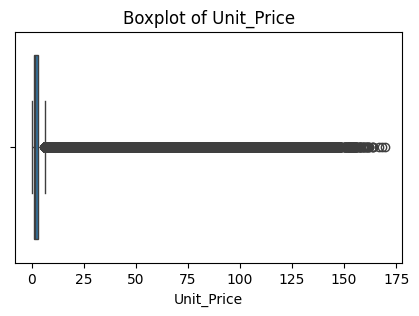

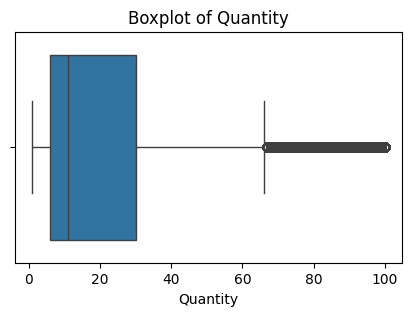

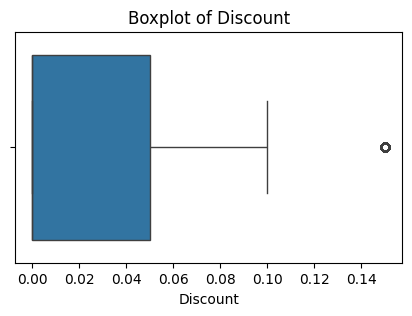

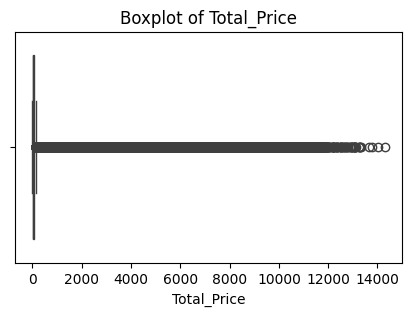

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Contoh visualisasi outlier dengan boxplot
features = ["Unit_Price", "Quantity", "Discount", "Total_Price"]
for feature in features:
    plt.figure(figsize=(5,3))
    sns.boxplot(x=sale[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()


In [21]:
sale["Unit_Price"] = np.log1p(sale["Unit_Price"])


In [24]:
upper_cap_quantity = sale["Quantity"].quantile(0.99)
lower_cap_quantity = sale["Quantity"].quantile(0.01)

sale["Quantity"] = np.clip(sale["Quantity"], lower_cap_quantity, upper_cap_quantity)

upper_cap_discount = sale["Discount"].quantile(0.99)
lower_cap_discount = sale["Discount"].quantile(0.01)

sale["Discount"] = np.clip(sale["Discount"], lower_cap_discount, upper_cap_discount)


In [2]:
pip install plotly

In [4]:
!pip install scikit-learn

   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.1 MB 2.8 MB/s eta 0:00:04
   - -------------------------------------- 0.5/11.1 MB 2.8 MB/s eta 0:00:04
   - -------------------------------------- 0.5/11.1 MB 2.8 MB/s eta 0:00:04
   -- ------------------------------------- 0.8/11.1 MB 745.8 kB/s eta 0:00:14
   --- ------------------------------------ 1.0/11.1 MB 825.2 kB/s eta 0:00:13
   ---- ----------------------------------- 1.3/11.1 MB 944.7 kB/s eta 0:00:11
   ------ --------------------------------- 1.8/11.1 MB 1.2 MB/s eta 0:00:08
   -------- ------------------------------- 2.4/11.1 MB 1.4 MB/s eta 0:00:07
   ---------- ----------------------------- 2.9/11.1 MB 1.5 MB/s eta 0:00:06
   ---------- ----------------------------- 2.9/11.1 MB 1.5 MB/s eta 0:00:06
   ----------- ---------------------------- 3.1/11.1 MB 1.4 MB/s eta 0:00:06
   ----